# Análise Exploratória em Conjunto de Dados do TCE-RS

# Análise 3

# Business Understanding

    - Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?
    - É possível identificar algum padrão nas compras? Seja por época do ano ou por tipo de órgão comprador? 
    - O que mais é possível descobrir sobre as licitações do estado?
    - Manual disponível em: https://portalnovo.tce.rs.gov.br/repo/cex/licitacon/eValidador-licitacon-manual-layout-1.4.pdf

## Data Undestanding

In [1]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Importando arquivo consolidado licitacao.csv
path = r'C:\Users\casoto\Desktop\TCE-RS'
licitacoes = pd.read_csv(path + '\\licitacoes.csv')
pd.options.display.max_columns = None # Mostrar todas as colunas
licitacoes['DT_HOMOLOGACAO'] = pd.to_datetime(licitacoes['DT_HOMOLOGACAO'], format = '%Y-%m-%d')
licitacoes.drop(columns = ['Unnamed: 0'], inplace = True)
licitacoes.head()

,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,TP_OBJETO,DS_OBJETO,VL_LICITACAO,DT_HOMOLOGACAO
0,PM DE NOVA PALMA,3.0,2019,TMP,CSE,CONTRATAÇÃO GLOBAL DE EMPRESA PARA CONSTRUÇÃO ...,276405.12,2019-10-11
1,PM DE NOVA PALMA,1.0,2019,TMP,OSE,"Reforma da UBS do Distrito da Vila Cruz, pintu...",75396.00,2019-04-29
2,CIA. ÁGUAS TERMAIS MARCELINO RAMOS - TERMASA,3.0,2019,EST,PER,Constitui objeto da presente Licitação a explo...,105612.48,2019-08-14
3,PM DE ESPERANÇA DO SUL,34.0,2019,CNV,OUS,Contratação de serviços de arbitragem para atu...,10600.00,2019-05-07
4,PM DE BOA VISTA DO SUL,3.0,2019,PRP,OUS,Contratação de empresa para prestação de servi...,430770.00,2019-01-28


In [3]:
# Identificar tamanho da base de dados
licitacoes.shape

(237011, 8)

# Data Exploration

## Avaliando Outliers

Mediana: 15991.45 
Quantidade de registros: (165937, 8)


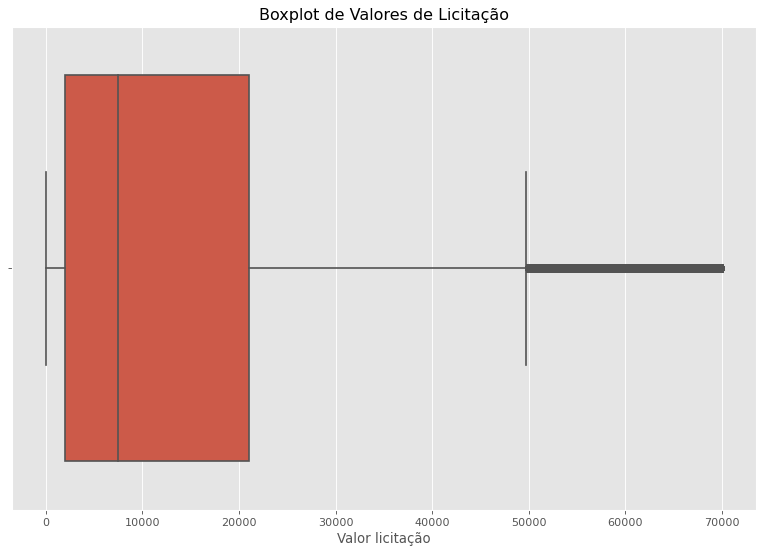

In [4]:
# Identificando outliers (amostragem com margem escolhida ate R$70000)

figure(figsize=(12, 8), dpi=80) # Alterar escala

subset_licitacoes = pd.DataFrame(licitacoes.loc[licitacoes['VL_LICITACAO'] < 70000])
sns.boxplot(x=subset_licitacoes['VL_LICITACAO']).set(title = 'Boxplot de Valores de Licitação', xlabel = 'Valor licitação')
print('Mediana:', licitacoes['VL_LICITACAO'].median(), '\nQuantidade de registros:', subset_licitacoes.shape)

        No boxplot acima, foi avaliado com subset para determinar faixa de outliers dentro do dataset analisado. Por conta  dos outliers, o gráfico em resolução original ficou fora de escala, portanto foi delimitado uma faixa de valores de até  70 mil reais.

In [5]:
# Limpando dados com informacões faltantes
subset_licitacoes['MES_LICITACAO'] = pd.DatetimeIndex(subset_licitacoes['DT_HOMOLOGACAO']).month
subset_licitacoes.dropna(subset = ['MES_LICITACAO', 'VL_LICITACAO'], inplace = True)
subset_licitacoes.sort_values(by = 'VL_LICITACAO', ascending = False, inplace = True)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Remover notação cientifica do DataFrame
subset_licitacoes

,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,TP_OBJETO,DS_OBJETO,VL_LICITACAO,DT_HOMOLOGACAO,MES_LICITACAO
71601,PM DE BARÃO,20.00,2018,PRP,OUS,SERVIÇOS DE PROFISSIONAL NA ÁREA DE SERVIÇO SO...,69999.96,2018-05-15,5.00
155641,PM DE PAROBÉ,19.00,2017,PRP,OUS,Constitui objeto da presente licitação a contr...,69999.96,2017-05-10,5.00
157763,PM DE FREDERICO WESTPHALEN,26.00,2017,PRP,COM,aquisição de materiais para demarcação viária,69997.50,2017-04-26,4.00
68766,PM DE SÃO JERÔNIMO,53.00,2019,PRP,CSE,CONTRATAÇÃO DE SERVIÇO DE CONSULTA COM OPTOMET...,69996.00,2019-04-30,4.00
158976,PM DE AMETISTA DO SUL,6.00,2017,CNV,COM,AQUISIÇÃO DE MUDAS DE CITRUS PARA DISTRIBUIÇÃO...,69995.12,2017-05-11,5.00
...,...,...,...,...,...,...,...,...,...
105424,PM DE MORRO REUTER,40.00,2018,PRP,OUS,Seguro Veículos,0.00,2018-09-13,9.00
158497,PM DE GAURAMA,13.00,2017,CNV,COM,Aquisição de lubrificantes para a frota munici...,0.00,2017-05-16,5.00
26643,PM DE SAPUCAIA DO SUL,21.00,2019,PRE,COM,REGISTRO DE PREÇOS PARA FUTURA E EVENTUAL AQUI...,0.00,2019-08-05,8.00
202163,PM DE FLORES DA CUNHA,119.00,2017,PRP,COM,Registro de preços de troféus e medalhas para ...,0.00,2017-11-21,11.00


In [6]:
# Identificar tamanho da base de dados
subset_licitacoes.shape

(85270, 9)

## Sazonalidade por Valor Total em Licitações

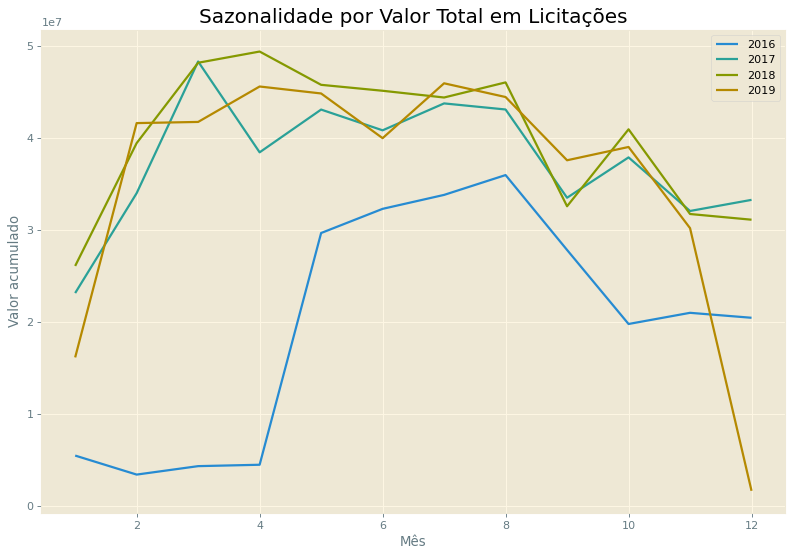

In [7]:
# Grafico com comparação entre anos, mês-a-mês por valor acumulado

figure(figsize=(12, 8), dpi = 80) # Alterar escala

gpby_vl_licitacao = subset_licitacoes.groupby(['ANO_LICITACAO', 'MES_LICITACAO']).sum()
gpby_vl_licitacao.drop(columns = ['NR_LICITACAO'], inplace = True)
gpby_vl_licitacao

overall = gpby_vl_licitacao.unstack(level=0)
with plt.style.context('Solarize_Light2'):
    for col_id in range(4):
        plt.plot(overall.iloc[:,col_id])
    plt.legend([x for x in range(2016,2020)])
    plt.title('Sazonalidade por Valor Total em Licitações', fontsize = 18)
    plt.xlabel('Mês')
    plt.ylabel('Valor acumulado')

        No gráfico acima, foi apresentado anualmente (linhas) uma análise sazonal por valor total em licitações como uma forma de identificação visual de desvios mais agravantes por período. Alguns questionamentos podem ser feitos a partir deste gráficos, como:
        1. Porque houve um aumento tão grande nas licitações entre os anos de 2016 e 2017?
        2. Porque houveram quedas tão abruptas em determinados períodos (ex.: Nov/2019-Dez/2019)?
        3. Porque houveram aumentos tão abruptos em determinados períodos (ex.: Abr/2016-Mai/2016)?

In [8]:
# Agrupar totais de licitacões por modalidades, ano-a-ano
gpby_vl_licitacao = subset_licitacoes.groupby(['ANO_LICITACAO', 'MES_LICITACAO']).sum()
gpby_vl_licitacao['DIFF'] = gpby_vl_licitacao['VL_LICITACAO'].diff()
gpby_vl_licitacao['DELTA'] = round((gpby_vl_licitacao['DIFF'] / gpby_vl_licitacao['VL_LICITACAO']) * 100, 2)
gpby_vl_licitacao.drop(columns = ['NR_LICITACAO'], inplace = True)

delta_less = gpby_vl_licitacao.sort_values(by = ['DELTA'], ascending = True)
delta_more = gpby_vl_licitacao.sort_values(by = ['DELTA'], ascending = False)

#### Quedas

In [9]:
# Porque os valores despencaram em Dez/2019?
delta_less.head()

VL_LICITACAO         DIFF    DELTA
ANO_LICITACAO MES_LICITACAO                                    
2019          12.00            1668118.77 -28517817.17 -1709.58
              1.00            16152351.86 -14948893.32   -92.55
2016          2.00             3429978.92  -2064385.13   -60.19
2018          9.00            32561811.05 -13447773.73   -41.30
2016          10.00           19780792.48  -8037594.78   -40.63

In [10]:
# Verificando categorias/modalidades com maiores quedas

gpby_delta_less = subset_licitacoes.loc[(subset_licitacoes['ANO_LICITACAO'] == 2019) & \
                 (subset_licitacoes['MES_LICITACAO'].isin([11,12]))] \
                 .groupby(['MES_LICITACAO', 'CD_TIPO_MODALIDADE']).sum()

# Consolidando agrupamento por modalidades
gpby_delta_less.sort_values(by = 'VL_LICITACAO', ascending = False, inplace = True)
gpby_delta_less.drop(columns = ['NR_LICITACAO', 'ANO_LICITACAO'], inplace = True)
gpby_delta_less = gpby_delta_less.unstack(level = 0)

# Adicionando colunas de cálculos e estabelecendo ordenação por coluna 'DELTA'
gpby_delta_less['DIFF'] = gpby_delta_less.iloc[:,1] - gpby_delta_less.iloc[:,0]
gpby_delta_less['DELTA'] = round((gpby_delta_less['DIFF'] / gpby_delta_less.iloc[:,0]) * 100, 2)
gpby_delta_less = gpby_delta_less.fillna(0)
gpby_delta_less.sort_values(by = 'DELTA', ascending = True, inplace = True)

gpby_delta_less

VL_LICITACAO                   DIFF  DELTA
MES_LICITACAO              11.0      12.0                    
CD_TIPO_MODALIDADE                                           
TMP                  2204130.65  41050.39  -2163080.26 -98.14
PRE                  5828803.23 125189.88  -5703613.35 -97.85
PRI                  1735219.12  40200.00  -1695019.12 -97.68
PRP                 13276840.64 851286.75 -12425553.89 -93.59
PRD                  3011736.84 224282.90  -2787453.94 -92.55
CNV                  1889201.79 303871.77  -1585330.02 -83.92
RPO                   324151.30  82237.08   -241914.22 -74.63
CHP                   207438.13      0.00         0.00   0.00
CNC                   435566.09      0.00         0.00   0.00
CPC                     8384.52      0.00         0.00   0.00
CPP                    35963.19      0.00         0.00   0.00
ESE                    12188.00      0.00         0.00   0.00
LEI                   340017.20      0.00         0.00   0.00
PDE                   876295.24      0.00         0.00   0.00

        Na tabela acima, podemos verificar os maiores deltas (em percentual) relativos ao meses de Novembro e Dezembro de 2019 com quedas abruptas em algumas modalidades, por exemplo:
        1. Tomada de preços (TMP; queda de 98.14% em relação ao último mês);
        2. Pregão Eletrônico (PRE; queda de 97.85% em relação ao último mês);
        3. Processo de Inexigibilidade (PRI; queda de 97.68% em relação ao último mês).
        4. Quedas significativas em outras modalidades, como PRP, PRD, CNV e RPO também (vide tabela).
        5. Nenhuma licitação registrada em Dezembro para as demais categorias.

#### Aumentos

In [11]:
# Porque os valores aumentaram tanto em Mar/2016?
delta_more.head()

VL_LICITACAO        DIFF  DELTA
ANO_LICITACAO MES_LICITACAO                                 
2016          5.00            29656334.18 25158637.81  84.83
2019          2.00            41590580.94 25438229.08  61.16
2018          2.00            39418088.49 13336846.94  33.83
2017          2.00            33982410.84 10844740.41  31.91
              3.00            48277145.61 14294734.77  29.61

In [12]:
# Verificando categorias/modalidades com maiores aumentos

gpby_delta_more = subset_licitacoes.loc[(subset_licitacoes['ANO_LICITACAO'] == 2016) & \
                 (subset_licitacoes['MES_LICITACAO'].isin([4,5]))] \
                 .groupby(['MES_LICITACAO', 'CD_TIPO_MODALIDADE']).sum()

# Consolidando agrupamento por modalidades
gpby_delta_more.sort_values(by = 'VL_LICITACAO', ascending = False, inplace = True)
gpby_delta_more.drop(columns = ['NR_LICITACAO', 'ANO_LICITACAO'], inplace = True)
gpby_delta_more = gpby_delta_more.unstack(level = 0)

# Adicionando colunas de cálculos e estabelecendo ordenação por coluna 'DELTA'
gpby_delta_more['DIFF'] = gpby_delta_more.iloc[:,1] - gpby_delta_more.iloc[:,0]
gpby_delta_more['DELTA'] = round((gpby_delta_more['DIFF'] / gpby_delta_more.iloc[:,0]) * 100, 2)
gpby_delta_more = gpby_delta_less.fillna(0)
gpby_delta_more.sort_values(by = 'DELTA', ascending = False, inplace = True)

gpby_delta_more

VL_LICITACAO                   DIFF  DELTA
MES_LICITACAO              11.0      12.0                    
CD_TIPO_MODALIDADE                                           
CHP                   207438.13      0.00         0.00   0.00
CNC                   435566.09      0.00         0.00   0.00
CPC                     8384.52      0.00         0.00   0.00
CPP                    35963.19      0.00         0.00   0.00
ESE                    12188.00      0.00         0.00   0.00
LEI                   340017.20      0.00         0.00   0.00
PDE                   876295.24      0.00         0.00   0.00
RPO                   324151.30  82237.08   -241914.22 -74.63
CNV                  1889201.79 303871.77  -1585330.02 -83.92
PRD                  3011736.84 224282.90  -2787453.94 -92.55
PRP                 13276840.64 851286.75 -12425553.89 -93.59
PRI                  1735219.12  40200.00  -1695019.12 -97.68
PRE                  5828803.23 125189.88  -5703613.35 -97.85
TMP                  2204130.65  41050.39  -2163080.26 -98.14

        Na segunda tabela, podemos verificar os maiores deltas (em percentual) relativos ao meses de Abril e Maio de 2016   com quedas abruptas em algumas modalidades, por exemplo:
        1. Chamamento Público/Credenciamento (houveram gastos contabilizados em Maio de R$ 10.830,00);
        2. Processo de Inexigibilidade (PRI; aumento expressivo de 2803% em relação ao último mês);
        3. Outros aumentos significativos em outras modalidades (CNV, PRD, PRP, etc.).

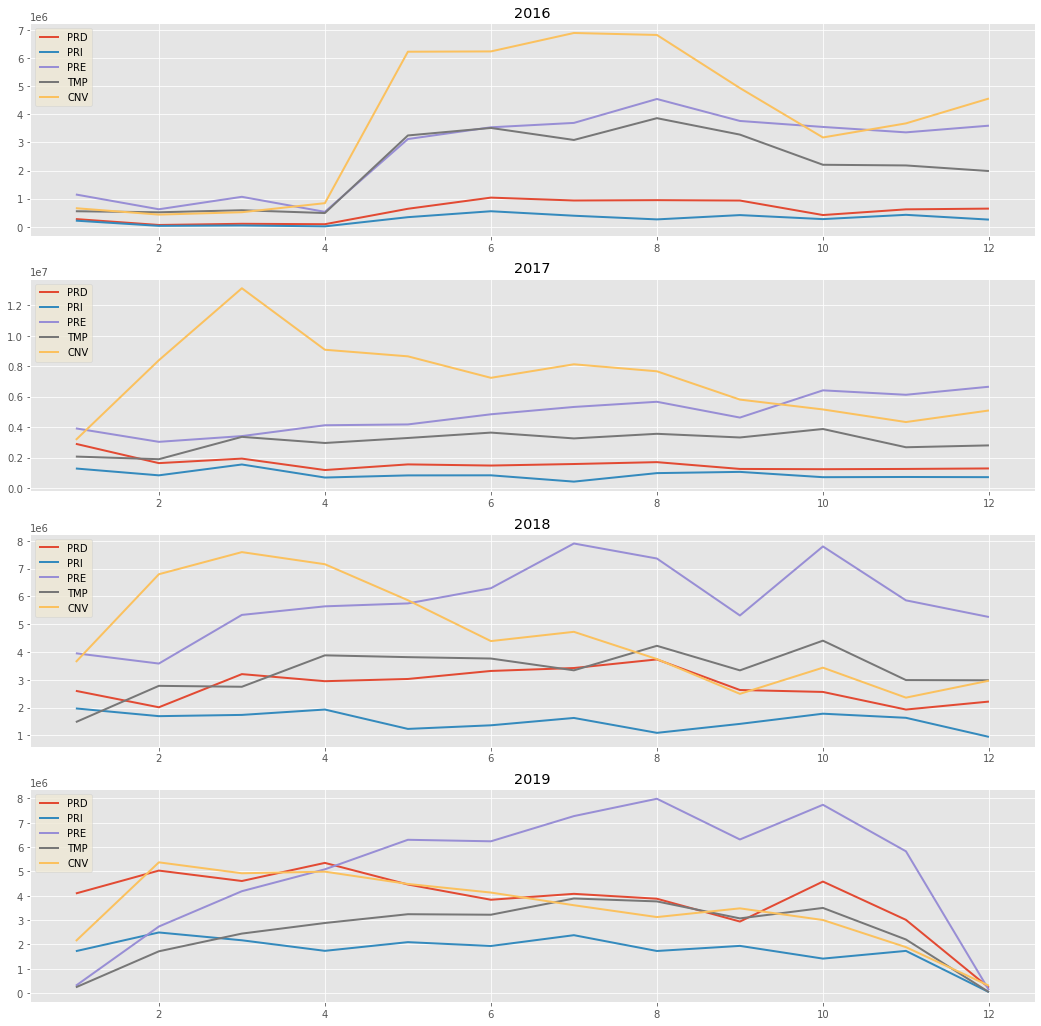

In [13]:
# Criando gráficos com acompanhamentos mensais para os principais tipos de contratação
# Declarar variáveis
years = [x for x in range(2016,2020)]
labels = ['PRD', 'PRI', 'PRE', 'TMP', 'CNV']
months = [x for x in range(1,13,1)]

fig, axs = plt.subplots(4, figsize = (18,18)) # Alterar escala

with plt.style.context('Solarize_Light2'):
    n = 0
    for y in years:
        # Criar base agrupada com ano filtrado
        gpby_modalidades_mensal = subset_licitacoes.loc[subset_licitacoes['ANO_LICITACAO'] == y].groupby(['MES_LICITACAO', 'CD_TIPO_MODALIDADE']).sum()
        gpby_modalidades_mensal.drop(columns = ['NR_LICITACAO', 'ANO_LICITACAO'], inplace = True)
        gpby_modalidades_mensal = gpby_modalidades_mensal.unstack(level = 0)
        for l in labels:
            axs[n].plot(months, gpby_modalidades_mensal.loc[l]) # Subplots por ano
            axs[n].title.set_text(y)
            axs[n].legend(labels, loc='upper left')
        n += 1

        Nos gráficos gerados acima, podemos ter uma ampla visão comparativa entre os anos e os principais tipos de contratação (elencados a partir do gráfico 'Quantidade de Registros por Forma de Contratação', no primeiro arquivo de análise), identificando assim diferentes tipos de comportamentos, tais como:
        1. Alguns tipos de contratação possuem baixa oscilação ao decorrer do ano (ex.: PRD);
        2. Outros tipos de contratação possuem maior variação nos primeiros bimestres do ano (ex.: CNV, primeiro e segundo bimestre dos anos de 2017-2019);
        3. Outros tipos de contratação possuem aumento de demanda no quarto e quinto bimestre (ex.: PRE).

        Esta visualização nos ajuda a ter um acompanhamento macro dos tipos de requisições feitos ao decorrer do ano.

## Principais Bens Materiais Comprados em Cada Orgão

In [14]:
# Consolidar principais bens materiais comprados em cada orgão
subset_licitacoes_com = subset_licitacoes.loc[subset_licitacoes['TP_OBJETO'] == 'COM'] # Filtrando apenas tipo de objeto = Compras
gpby_modalidade_com = subset_licitacoes_com.groupby(['NM_ORGAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE']).sum()
gpby_modalidade_com.drop(columns = ['NR_LICITACAO', 'MES_LICITACAO'], inplace = True)
gpby_modalidade_com.sort_values(by = 'VL_LICITACAO', ascending = False, inplace = True)
gpby_modalidade_com.head(20)
# Nota: Para o campo CD_TIPO_MODALIDADE, o link para o apêndice referido à descrição encontra-se indisponível no portal 
# (vide pág. 26, 'Valores: Consulte “Apêndice B” aba “1. Modalidades”); foram ulizados apenas as abreviaturas

VL_LICITACAO
NM_ORGAO                                ANO_LICITACAO CD_TIPO_MODALIDADE              
PM DE PELOTAS                           2017          PRE                   5312648.57
CIA. RIOGRANDENSE DE SANEAMENTO         2019          PDE                   4329567.65
PM DE PELOTAS                           2018          PRE                   3524727.71
                                        2016          PRE                   2650657.10
PM DE GUAÍBA                            2017          PRE                   2132637.13
CENTRAL DE LICITAÇÕES DO ESTADO         2018          PRE                   2009180.84
PM DE CACHOEIRA DO SUL                  2018          PRE                   1906309.78
                                        2019          PRE                   1869493.54
PM DE GUAPORÉ                           2018          PRP                   1849795.42
                                        2019          PRP                   1831046.78
                                        2017          PRP                   1742859.06
PM DE GETÚLIO VARGAS                    2018          PRP                   1723794.86
PM DE ERECHIM                           2018          PRP                   1716967.44
PM DE CACHOEIRA DO SUL                  2017          PRE                   1709208.67
PM DE FLORES DA CUNHA                   2017          PRP                   1655906.87
PM DE GETÚLIO VARGAS                    2019          PRP                   1627264.02
PM DE IJUÍ                              2018          PRP                   1625506.70
PM DE ERECHIM                           2016          PRP                   1608641.20
PM DE DOM PEDRITO                       2018          PRP                   1588981.29
FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO 2016          PRE                   1586321.03

## Top 20 Aquisições de Maior Valor (até 70 mil reais)

In [15]:
# gpby_modalidade_com.drop(columns = ['NR_LICITACAO'], inplace = True)
gpby_modalidade_com_max = subset_licitacoes_com.groupby(['NM_ORGAO', 'CD_TIPO_MODALIDADE']).max()
gpby_modalidade_com_max.head()
sum_by_value = subset_licitacoes_com.groupby(['NM_ORGAO', 'ANO_LICITACAO']).sum()

# Merge nas bases com somatoria e valores maximos encontrados + limpeza dos dados
merged = gpby_modalidade_com_max.merge(sum_by_value, left_on = ['NM_ORGAO', 'ANO_LICITACAO'], right_on = ['NM_ORGAO', 'ANO_LICITACAO'])
merged = merged.loc[merged['VL_LICITACAO_x'] == merged['VL_LICITACAO_y']][['ANO_LICITACAO', 'DS_OBJETO', 'VL_LICITACAO_y']]
merged['CD_TIPO_MODALIDADE'] = subset_licitacoes_com.groupby(['NM_ORGAO']).max()['DS_OBJETO']
merged = merged.groupby(['NM_ORGAO', 'ANO_LICITACAO', 'DS_OBJETO']).sum()
merged.sort_values(by = ['VL_LICITACAO_y', 'NM_ORGAO'], ascending = False, inplace = True)
merged.head(20)

,,,VL_LICITACAO_y
NM_ORGAO,ANO_LICITACAO,DS_OBJETO,
CM DE BOA VISTA DO INCRA,2019,"VEICULO AUTOMOTOR ZERO KM, LICENCIADO E EMPLACADO, ANO MODELO 2019",68000.00
CM DE PIRAPÓ,2018,"aquisição de um veículo automotor novo na cor branca, sedan, zero quilômetro, modelo 2019, com quatro rodas, cinco passageiros, com potência mínima de 105 CV a gasolina, motor mínimo de 1.6, bicombustível (gasolina/álcool), pneu roda 15 em aço, tanque com capacidade mínima de 50 (cinquenta) litros, porta mala com capacidade mínima de 500 (quinhentos) litros, com airbag duplo, freios ABS, computador de bordo, para-choques na cor do veículo, retrovisores com regulagem interna, desembaçador do vidro traseiro, vidros elétricos dianteiros e traseiros, travas elétricas, alarme, ar condicionado, direção hidráulica ou elétrica, desembaçador traseiro, jogo de tapes internos, devidamente equipado com todos os acessórios de segurança exigidos na legislação vigente, assistência técnica autorizada com distância não superior a 160 km da cidade de Pirapó, RS, emplacado no Município de Pirapó, RS.",66630.00
CM DE SALTO DO JACUÍ,2016,"Aquisição de um veículo zero quilômetro, conforme descrições constantes no termo de referência ANEXO I.",63000.00
CM DE NOVA ESPERANÇA DO SUL,2017,"AQUISIÇÃO DE UM VEÍCULO, ZERO QUILÔMETRO, PARA USO EXCLUSIVO DA CÂMARA DE VEREADORES, DO MUNICÍPIO DE NOVA ESPERANÇA DO SUL, RS.",61050.00
CM DE SÃO JERÔNIMO,2016,"Aquisição de 01 (Um) Veículo Nacional 0 (zero) kilômetro, de fabricação nacional tipo Sedan, na cor preta de acordo com as especificações técnicas contidas no Anexo I do Edital.",60000.00
CM DE MAÇAMBARÁ,2017,AQUISIÇÃO DE 01(UM) VEICULO OFICIAL PARA CÂMARA MUNICIPAL DE VEREADORES DE MAÇAMBARÁ E ALIENAÇÃO DE VEICULO VECTRA IRS 0393,60000.00
CM DE CERRO GRANDE,2017,"COMPRA DE UM VEÍCULO SEDAM 4 PORTAS 0KM ANO/MODELO2017, MOTOR - POTENCIA MÍNIMA 80 CAVALOS 1.0, PINTURA SOLIDA, SISTEMA DE SOM, TANQUE DE COMBUSTÍVEL COM NO MINIMO DE 50 LITROS, COMPUTADOR DE BORDO.",60000.00
CM DE CRUZ ALTA,2019,Tem por objeto a aquisição de 18 (dezoito) computadores tipo Notebook,59999.94
BANRISUL S.A. CORRETORA DE VALORES MOBILIÁRIOS E CÂMBIO,2019,AQUISIÇÃO DE COMPUTADORES DESKTOP.,59900.00


### Fim